###### Loading / Creating the dataset

In [65]:
# Loading necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating dataset of person's height due to various treatments
treatments = ['T1','T2','T3','T4']
Height_T1 = [60,67,42,67,56,62,64,59,72,71]
Height_T2 = [50,52,43,67,67,59,67,64,63,65]
Height_T3 = [48,49,50,55,56,61,61,60,59,64]
Height_T4 = [47,67,54,67,68,65,65,56,60,65]

# Creating Treatments' Lists
T1 = ('T1 '*len(Height_T1)).split(' ')[0 : len(Height_T1)]
T2 = ('T2 '*len(Height_T2)).split(' ')[0 : len(Height_T2)]
T3 = ('T3 '*len(Height_T3)).split(' ')[0 : len(Height_T3)]
T4 = ('T4 '*len(Height_T4)).split(' ')[0 : len(Height_T4)]

# Creating dictionary of dataset
dic = {'Height' : (Height_T1 + Height_T2 + Height_T3 + Height_T4) , 'Treatment' : (T1 + T2 + T3 + T4)}
data = pd.DataFrame(dic)
data.head()

,Height,Treatment
0,60,T1
1,67,T1
2,42,T1
3,67,T1
4,56,T1


###### Determine whether there is any difference between the treatment methods

Since there are 4 types of treatments / groups we will do ANOVA test

###### Visualizing the treatments - Plotting boxplot

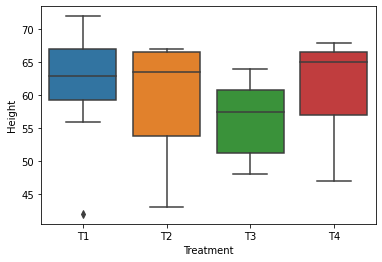

In [66]:
sns.boxplot(x = 'Treatment', y = 'Height', data = data)
plt.show()

We can observe only slight difference in heights ranges (IQRs) of treatments due to random variation.
We can't observe any significant difference in range of heights of children who have undergone different treatments. 

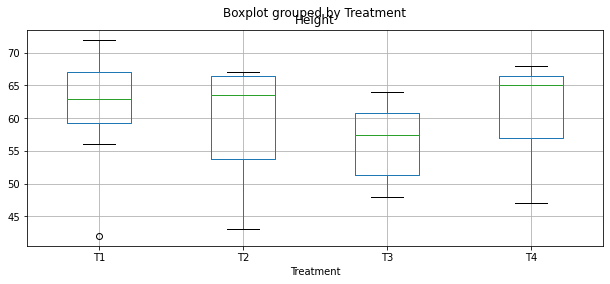

In [79]:
data.boxplot('Height', by = 'Treatment', figsize = (10,4))
plt.show()

###### Let us check the mean heights of different treatments

In [67]:
data.groupby('Treatment').mean()

,Height
Treatment,
T1,62.0
T2,59.7
T3,56.3
T4,61.4


We can't observe significant mean difference in heights of childeren who have undergone different types of treatments 

###### ANOVA test - using statsmodels

- Above 2 methods are not robust in telling that which treatment is better. Hence, we will perform ANOVA.
- ANOVA takes :-
    - H0 : Mean Heights of all treatments are same (mu1 = mu2 = mu3 = mu4) (OR) Var(b/w)treatments = Var(within)treatments
    - HA : Atleast one of the mean heights of treatments differ (OR) Var(b/w)treatments != Var(within)treatments

In [68]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Height ~ Treatment', data = data).fit()

anova_table = sm.stats.anova_lm(mod, typ = 2)
print(anova_table)

           sum_sq    df         F   PR(>F)
Treatment   196.5   3.0  1.144327  0.34436
Residual   2060.6  36.0       NaN      NaN


- Since, F_stat = 1.144 is closure to 1, so, we will accept null hypothesis,i.e, there is no significant difference in mean heights of children who have undergone different types of treatments.
- As p_value = 0.344 is > alpha (0.05), so, we accept null hypothesis. 

###### ANOVA test - using formula

In [87]:
# Calculate mean of different treatments
mean_data = data.groupby('Treatment')[['Height']].mean()
mean_data

,Height
Treatment,
T1,62.0
T2,59.7
T3,56.3
T4,61.4


In [90]:
t1_bar = mean_data.iloc[0][0] # Mean heights of treatment-1
t2_bar = mean_data.iloc[1][0] # Mean heights of treatment-2
t3_bar = mean_data.iloc[2][0] # Mean heights of treatment-3
t4_bar = mean_data.iloc[3][0] # Mean heights of treatment-3

In [92]:
# Calculating grand mean
t_bar = data['Height'].mean() # Mean of all observations (or) mean of all treatments
t_bar

59.85

In [116]:
# Calculate sum of squares between the groups
n = data.groupby('Treatment')['Height'].count()[0] # No. of observations per group
ssb = n * sum([(ti_bar - t_bar)**2 for ti_bar in mean_data['Height']])
ssb

196.5000000000001

In [126]:
# Calculate sum of squares within the groups
ssw1 = sum([(ti - t1_bar)**2 for ti in data[data['Treatment'] == 'T1']['Height']])
ssw2 = sum([(ti - t2_bar)**2 for ti in data[data['Treatment'] == 'T2']['Height']])
ssw3 = sum([(ti - t3_bar)**2 for ti in data[data['Treatment'] == 'T3']['Height']])
ssw4 = sum([(ti - t4_bar)**2 for ti in data[data['Treatment'] == 'T4']['Height']])
ssw = ssw1 + ssw2 + ssw3 +ssw4
ssw

2060.6

In [145]:
# Calculate variance between the groups
k = data['Treatment'].nunique() # No. of treatment groups
df_b = k - 1
var_b = ssb / df_b
var_b

65.50000000000004

In [146]:
# Calculate variance within the groups
df_w = n*k - k
var_w = ssw / df_w
var_w

57.23888888888889

In [148]:
# Calculate F-statistic
F_stat = var_b / var_w
print(round(F_stat,3))

1.144


As F_stat is closure to 1 ,i.e,there is no significant difference in variances of 4 treatments 

In [154]:
# Calculate p-value
import scipy.stats
p_value = 1 - scipy.stats.f.cdf(F_stat,df_b,df_w)
p_value

0.3443595629359095

As p_value > 0.05, so, we will accept null hypothesis, i.e., mean heights in all treatments remain same.

In [153]:
# Calculate R^2 - coeff. of determination
sst = ssb + ssw
R2 = ssb / sst
print('{} %'.format(round(R2*100,3)))

8.706 %


So, ANOVA model explains 8.7 % of variation in height i.e., the 4 treatments explain 8.7 % of variation in height

In [155]:
# Printing ANOVA Table
anova_dic = {'Source of variation': ['Between','Within', 'Total'], 'df' : [df_b,df_w, n- 1], 'Sum_Sq' : [ssb,ssw,sst]
            , 'Mean_Sum_Sq': [var_b,var_w,np.nan], 'F- Statistics': [F_stat,np.nan,np.nan], 'p - value' :[p_value,np.nan,np.nan]}
anova = pd.DataFrame(anova_dic)
anova

,Source of variation,df,Sum_Sq,Mean_Sum_Sq,F- Statistics,p - value
0,Between,3,196.5,65.500000,1.144327,0.34436
1,Within,36,2060.6,57.238889,NaN,NaN
2,Total,9,2257.1,NaN,NaN,NaN
